In [1]:
!date

vie ene 10 15:59:11 CET 2020


In [2]:
# Active system's automagic
%automagic on


Automagic is ON, % prefix IS NOT needed for line magics.


In [3]:
# Load work environment

In [4]:
import os
os.getcwd()

'/home/dsc/Repos/TFM_Categorize_providers_based_on_descriptions_of_the_drug_plans/03_Presentation'

In [5]:
#folder = '/home/dsc/Repos/TFM_Categorize_providers_based_on_descriptions_of_the_drug_plans/03_Presentation'
folder = os.getcwd()
!ls {folder}

01_Loading_and_preprocessing_original_data.ipynb
01_OUT_csv_original_data_transformed.csv
02_Draw_transformed_data.ipynb
03_Data_preparation_and_pipelines_of_naive_models.ipynb
04a_ROC_auc_SVC_svm_hyperparameters.ipynb
04_Automatic_hyperparameter_search.ipynb
04b_ROC_auc_LOGREG_SAG_hyperparameters.ipynb
04c_ROC_auc_LOGREG_SAGA_hyperparameters.ipynb
05_Apply_final_LOGREG_SAG_model.ipynb
06_Apply_final_ROC_auc_LOGREG_SAG_complete.ipynb


In [6]:
os.chdir(folder)
os.getcwd()

'/home/dsc/Repos/TFM_Categorize_providers_based_on_descriptions_of_the_drug_plans/03_Presentation'

In [7]:
# Load library for work and analitics data
import pandas as pd
import numpy as np

In [8]:
!ls -ltr ../03_Presentation/01_OUT_csv_original_data_transformed.csv

-rw-rw-r-- 1 dsc dsc 27565813 ene 10 15:18 ../03_Presentation/01_OUT_csv_original_data_transformed.csv


In [9]:
# Read from excel files complete with column names stipulated and transform them
# (1) Imports:
import os
import glob

In [10]:
# (2) File list:
path = os.chdir(os.getcwd() + '/..' + '/03_Presentation')
!pwd

/home/dsc/Repos/TFM_Categorize_providers_based_on_descriptions_of_the_drug_plans/03_Presentation


In [11]:
%%time
# (3) Upload cvsv file:
df_from_xlsx_total = pd.read_csv("01_OUT_csv_original_data_transformed.csv")

CPU times: user 467 ms, sys: 59.7 ms, total: 527 ms
Wall time: 472 ms


In [12]:
len(df_from_xlsx_total)

306183

In [13]:
df_from_xlsx_total.describe()

,PRIMA_MENSUAL_CONSOLIDADA,MEDICAMS_ANUALES_DEDUCIBLES,DESEMBOLSO_MAXIMO
count,306183.000000,306183.000000,306183.000000
mean,57.396914,86.437768,4462.490393
std,62.096889,133.430874,2121.624535
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3400.000000
50%,43.000000,0.000000,4500.000000
75%,87.000000,175.000000,6700.000000
max,388.000000,415.000000,6700.000000


In [14]:
df_from_xlsx_total.head()

,ESTADO,CONDADO,ORGANIZACION,TIPO_PLAN_GENERICO_MEDICARE,PRIMA_MENSUAL_CONSOLIDADA,MEDICAMS_ANUALES_DEDUCIBLES,TIPO_BENEFICIO,COBERTURA_ADICIONAL_OFRECIDA,DETALLE_BENEFICIO,DESEMBOLSO_MAXIMO,CLASIFICACION
0,Alabama,Autauga,UnitedHealthcare,HMO,0.0,0.0,Enhanced,No Gap Coverage,EA,4450.0,2.5
1,Alabama,Autauga,Blue Cross and Blue Shield of Alabama,PPO,99.0,130.0,Basic,No Gap Coverage,BA,3400.0,2.5
2,Alabama,Autauga,Blue Cross and Blue Shield of Alabama,PPO,199.0,0.0,Enhanced,No Gap Coverage,EA,3400.0,2.5
3,Alabama,Autauga,"Healthspring of Alabama, Inc.",HMO,0.0,0.0,NO_ASIGNADO,NO_ASIGNADO,NO_ASIGNADO,3400.0,3
4,Alabama,Autauga,"Healthspring of Alabama, Inc.",HMO,0.0,0.0,Enhanced,Many Generics,EA,3400.0,3


In [15]:
df_from_xlsx_total.shape

(306183, 11)

In [16]:
df_from_xlsx_total.duplicated().sum()

27938

In [17]:
# Check NULL values
df_from_xlsx_total.isnull().sum()

ESTADO                          0
CONDADO                         0
ORGANIZACION                    0
TIPO_PLAN_GENERICO_MEDICARE     0
PRIMA_MENSUAL_CONSOLIDADA       0
MEDICAMS_ANUALES_DEDUCIBLES     0
TIPO_BENEFICIO                  0
COBERTURA_ADICIONAL_OFRECIDA    0
DETALLE_BENEFICIO               0
DESEMBOLSO_MAXIMO               0
CLASIFICACION                   0
dtype: int64

In [18]:
# Check NaN values
df_from_xlsx_total.isna().sum()

ESTADO                          0
CONDADO                         0
ORGANIZACION                    0
TIPO_PLAN_GENERICO_MEDICARE     0
PRIMA_MENSUAL_CONSOLIDADA       0
MEDICAMS_ANUALES_DEDUCIBLES     0
TIPO_BENEFICIO                  0
COBERTURA_ADICIONAL_OFRECIDA    0
DETALLE_BENEFICIO               0
DESEMBOLSO_MAXIMO               0
CLASIFICACION                   0
dtype: int64

In [19]:
df_from_xlsx_total.dtypes

ESTADO                           object
CONDADO                          object
ORGANIZACION                     object
TIPO_PLAN_GENERICO_MEDICARE      object
PRIMA_MENSUAL_CONSOLIDADA       float64
MEDICAMS_ANUALES_DEDUCIBLES     float64
TIPO_BENEFICIO                   object
COBERTURA_ADICIONAL_OFRECIDA     object
DETALLE_BENEFICIO                object
DESEMBOLSO_MAXIMO               float64
CLASIFICACION                    object
dtype: object

In [20]:
df_from_xlsx_total.columns

Index(['ESTADO', 'CONDADO', 'ORGANIZACION', 'TIPO_PLAN_GENERICO_MEDICARE',
       'PRIMA_MENSUAL_CONSOLIDADA', 'MEDICAMS_ANUALES_DEDUCIBLES',
       'TIPO_BENEFICIO', 'COBERTURA_ADICIONAL_OFRECIDA', 'DETALLE_BENEFICIO',
       'DESEMBOLSO_MAXIMO', 'CLASIFICACION'],
      dtype='object')

In [21]:
# Dont limit column display
import pandas as pd
from IPython.display import display

pd.options.display.max_columns = None
pd.options.display.max_rows = None
display(df_from_xlsx_total.head(1))

,ESTADO,CONDADO,ORGANIZACION,TIPO_PLAN_GENERICO_MEDICARE,PRIMA_MENSUAL_CONSOLIDADA,MEDICAMS_ANUALES_DEDUCIBLES,TIPO_BENEFICIO,COBERTURA_ADICIONAL_OFRECIDA,DETALLE_BENEFICIO,DESEMBOLSO_MAXIMO,CLASIFICACION
0,Alabama,Autauga,UnitedHealthcare,HMO,0.0,0.0,Enhanced,No Gap Coverage,EA,4450.0,2.5


In [22]:
df_from_xlsx_total["ESTADO"] = df_from_xlsx_total["ESTADO"].astype(np.str)
df_from_xlsx_total["CONDADO"] = df_from_xlsx_total["CONDADO"].astype(np.str)
df_from_xlsx_total["ORGANIZACION"] = df_from_xlsx_total["ORGANIZACION"].astype(np.str)
df_from_xlsx_total["TIPO_PLAN_GENERICO_MEDICARE"] = df_from_xlsx_total["TIPO_PLAN_GENERICO_MEDICARE"].astype(np.str)
df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"] = df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"].astype(np.float64)
df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"] = df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"].astype(np.float64)
df_from_xlsx_total["TIPO_BENEFICIO"] = df_from_xlsx_total["TIPO_BENEFICIO"].astype(np.str)
df_from_xlsx_total["COBERTURA_ADICIONAL_OFRECIDA"] = df_from_xlsx_total["COBERTURA_ADICIONAL_OFRECIDA"].astype(np.str)
df_from_xlsx_total["DETALLE_BENEFICIO"] = df_from_xlsx_total["DETALLE_BENEFICIO"].astype(np.str)
df_from_xlsx_total["DESEMBOLSO_MAXIMO"] = df_from_xlsx_total["DESEMBOLSO_MAXIMO"].astype(np.float64)
df_from_xlsx_total["CLASIFICACION"] = df_from_xlsx_total["CLASIFICACION"].astype(np.str)

In [23]:
df_from_xlsx_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306183 entries, 0 to 306182
Data columns (total 11 columns):
ESTADO                          306183 non-null object
CONDADO                         306183 non-null object
ORGANIZACION                    306183 non-null object
TIPO_PLAN_GENERICO_MEDICARE     306183 non-null object
PRIMA_MENSUAL_CONSOLIDADA       306183 non-null float64
MEDICAMS_ANUALES_DEDUCIBLES     306183 non-null float64
TIPO_BENEFICIO                  306183 non-null object
COBERTURA_ADICIONAL_OFRECIDA    306183 non-null object
DETALLE_BENEFICIO               306183 non-null object
DESEMBOLSO_MAXIMO               306183 non-null float64
CLASIFICACION                   306183 non-null object
dtypes: float64(3), object(8)
memory usage: 25.7+ MB


In [24]:
df_from_xlsx_total.groupby('ESTADO').size()

ESTADO
Alabama             4094
Arizona             1046
Arkansas            7016
California          3175
Colorado            6902
Connecticut         1045
Delaware             128
Florida             9271
Georgia            11841
Hawaii               325
Idaho               2803
Illinois           10164
Indiana             8936
Iowa                5161
Kansas              5674
Kentucky            8025
Louisiana           4765
Maine               1596
Maryland            1256
Massachusetts       2016
Michigan           12339
Minnesota          19958
Mississippi         4754
Missouri            9709
Montana             2008
Nebraska            2301
Nevada               576
New Hampshire        618
New Jersey          1958
New Mexico          2097
New York           13214
North Carolina      8815
North Dakota        3442
Ohio               14604
Oklahoma            5798
Oregon              3496
Pennsylvania       15594
Puerto Rico        16816
Rhode Island         420
South Carolina    

In [25]:
df_from_xlsx_total.groupby('CONDADO').size()

CONDADO
Abbeville                  83
Acadia                     69
Accomack                   29
Ada                       181
Adair                     259
Adams                    1071
Addison                    58
Adjuntas                  211
Aguada                    211
Aguadilla                 211
Aguas Buenas              213
Aibonito                  213
Aiken                      67
Aitkin                    252
Alachua                    98
Alamance                  127
Alameda                    70
Alamosa                   127
Albany                    317
Albemarle                  35
Alcona                    119
Alcorn                     43
Alexander                 145
Alexandria City           120
Alfalfa                    64
Alger                      77
Allamakee                  77
Allegan                   155
Allegany                  257
Alleghany                 117
Allegheny                 240
Allen                     491
Allendale                  51
Al

In [26]:
df_from_xlsx_total.groupby('ORGANIZACION').size()

ORGANIZACION
'Ohana Health Plan                                       18
ADVANTAGE Health Solutions, Inc.                        855
AETNA HEALTH INC. (GA)                                   11
AMERICA'S 1ST CHOICE HEALTH PLANS, INC.                 234
AMERICA'S 1ST CHOICE INSURANCE COMPANY OF NC, INC        70
AMERICA'S 1ST CHOICE INSURANCE COMPANY OF NC, INC.       28
AMERIGROUP                                               16
ARKANSAS BLUE CROSS AND BLUE SHIELD                     949
ATRIO Health Plans                                      169
Abrazo Advantage Health Plan                             21
Access Medicare                                          36
ActiveSaver MSA or BlueSaver MSA                        250
Advantage Medicare Plan                                   3
Advocare                                                192
Aetna Medicare                                         7748
Affinity Health Plan                                     88
AgeWell New York           

In [27]:
df_from_xlsx_total.groupby('TIPO_PLAN_GENERICO_MEDICARE').size()

TIPO_PLAN_GENERICO_MEDICARE
Cost            33509
HMO            107583
MSA              2511
NO_ASIGNADO        32
PFFS            38305
PPO            124243
dtype: int64

In [28]:
df_from_xlsx_total.groupby('PRIMA_MENSUAL_CONSOLIDADA').size()

PRIMA_MENSUAL_CONSOLIDADA
0.0      99728
1.6          7
2.0         62
2.1          7
2.4          3
2.8         13
3.0         63
3.6          9
4.0          7
4.4          6
4.5          4
4.8          7
5.0        351
6.0         89
7.0         23
7.7         13
8.0        106
9.0        172
9.4         46
10.0      1204
10.6        22
11.0        17
11.1         4
11.6         7
11.9         2
12.0       112
12.1        62
12.3         8
12.5        95
12.7        34
13.0       206
13.2        26
13.9         6
14.0       378
14.1        25
14.3        61
14.4        13
14.5        12
14.6        20
14.7         5
14.9         4
15.0      2659
15.3         1
15.5        96
15.6         6
15.9        11
16.0       512
16.1        11
16.2         4
16.3        10
16.4       157
16.5         5
16.6         7
16.9        87
17.0       676
17.2        53
17.3         4
17.5       165
17.7         2
17.8        11
17.9         9
18.0       700
18.3         7
18.4        33
18.5         1

In [29]:
df_from_xlsx_total.groupby('MEDICAMS_ANUALES_DEDUCIBLES').size()

MEDICAMS_ANUALES_DEDUCIBLES
0.0      198774
20.0        241
25.0         58
30.0         75
35.0        362
40.0        332
41.0          7
45.0         88
50.0       2504
55.0        428
60.0       2073
65.0        260
70.0         74
71.0        212
75.0       1463
79.0         30
80.0        341
85.0        382
87.0        325
90.0        383
91.0         36
92.0         11
95.0       1786
100.0      5408
103.0        16
104.0         1
105.0       324
110.0       120
115.0       272
117.0         2
118.0        30
119.0         1
120.0       741
123.0        22
125.0      1572
130.0       441
131.0         2
135.0        52
140.0       138
141.0         2
145.0       176
146.0         1
149.0         2
150.0      4999
151.0        17
153.0        34
155.0       483
160.0       780
162.0         1
165.0       350
170.0       697
172.0        11
173.0         1
175.0      2950
176.0         8
179.0         1
180.0       526
185.0       377
190.0       395
195.0      4402
198.0       

In [30]:
df_from_xlsx_total.groupby('TIPO_BENEFICIO').size()

TIPO_BENEFICIO
Basic           50009
Enhanced       176782
NO_ASIGNADO     79392
dtype: int64

In [31]:
df_from_xlsx_total.groupby('COBERTURA_ADICIONAL_OFRECIDA').size()

COBERTURA_ADICIONAL_OFRECIDA
All Generics                      1839
All Generics and All Brands         11
All Generics and Few Brands        408
All Generics and Some Brands         6
All Generics, All Brands             3
All Generics, Few Brands           207
Call plan for details               10
Few Brands                           7
Few Generics                      2830
Few Generics and Few Brands       9672
Few Generics, Few Brands          4433
Many Generics                    10695
Many Generics and Few Brands       644
Many Generics and Some Brands      219
Many Generics, Few Brands          151
Many Generics, Many Brands           1
Many Generics, Some Brands          91
NO_ASIGNADO                      79392
No                               87680
No Gap Coverage                  50365
Some Generics                     3749
Some Generics and Few Brands       664
Some Generics, Few Brands          344
Yes                              52762
dtype: int64

In [32]:
df_from_xlsx_total.groupby('DETALLE_BENEFICIO').size()

DETALLE_BENEFICIO
AE               1522
BA              34710
DS              13777
EA             176782
NO_ASIGNADO     79392
dtype: int64

In [33]:
df_from_xlsx_total.groupby('DESEMBOLSO_MAXIMO').size()

DESEMBOLSO_MAXIMO
0.00       33921
50.00          1
200.00         4
225.00         4
400.00        19
500.00        74
750.00         6
900.00        64
999.00         6
1000.00      204
1200.00      509
1250.00        1
1300.00       10
1400.00       19
1499.00        9
1500.00      528
1700.00       15
1750.00       20
1800.00        8
1899.00        2
1900.00       93
1950.00        4
1975.00       22
2000.00      557
2100.00       15
2175.00        8
2200.00       60
2225.00       28
2250.00      202
2300.00       83
2350.00       29
2375.00        8
2400.00       50
2430.00      183
2450.00       53
2500.00     2238
2550.00       76
2600.00       30
2660.00        3
2675.00       48
2700.00      360
2750.00       48
2799.00        2
2800.00      559
2850.00       59
2900.00      629
2950.00       75
2960.00        7
3000.00    14481
3050.00       39
3100.00      197
3125.00        7
3150.00       14
3200.00     1296
3250.00     6931
3300.00      908
3315.00       19
3350.00     2

In [34]:
df_from_xlsx_total.groupby('CLASIFICACION').size()

CLASIFICACION
2                667
2.5            22203
3              46156
3.5            78743
4              73771
4.5            54769
5               7356
NO_ASIGNADO    22518
dtype: int64

In [35]:
# Load library for work and analitics data in ML
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [36]:
#inicio

In [37]:
# Review how many rows are there according to "RATING", how central variable.

In [38]:
df_from_xlsx_total.columns

Index(['ESTADO', 'CONDADO', 'ORGANIZACION', 'TIPO_PLAN_GENERICO_MEDICARE',
       'PRIMA_MENSUAL_CONSOLIDADA', 'MEDICAMS_ANUALES_DEDUCIBLES',
       'TIPO_BENEFICIO', 'COBERTURA_ADICIONAL_OFRECIDA', 'DETALLE_BENEFICIO',
       'DESEMBOLSO_MAXIMO', 'CLASIFICACION'],
      dtype='object')

In [39]:
######### Visual tests

In [40]:
df_visual_sample = df_from_xlsx_total.sample(n=5000).reset_index(drop=True)

In [41]:
# Draw the columns individually by grouped size counter and per pairs

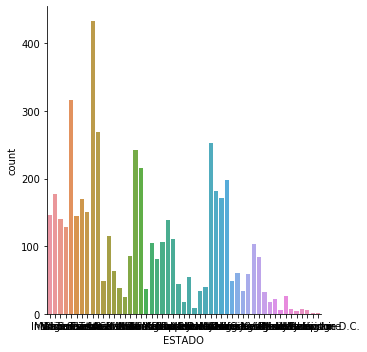

In [42]:
sb.catplot('ESTADO',data=df_visual_sample,kind="count")

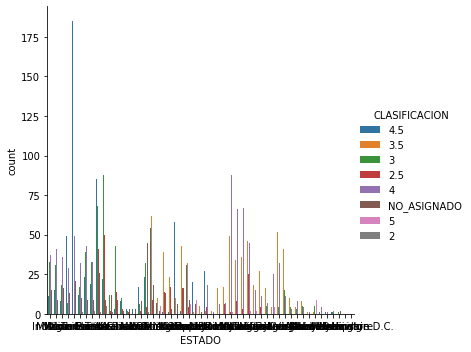

In [43]:
sb.catplot('ESTADO',data=df_visual_sample,hue='CLASIFICACION',kind="count")

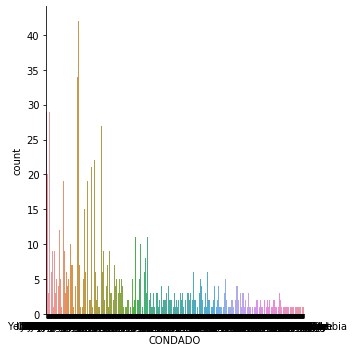

In [44]:
sb.catplot('CONDADO',data=df_visual_sample,kind="count")

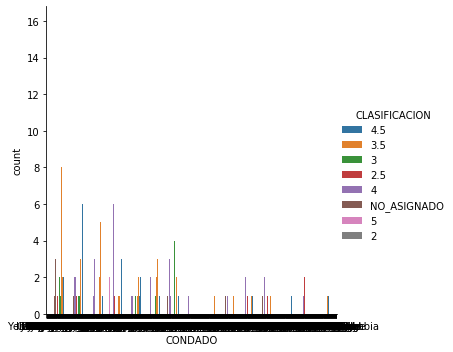

In [45]:
sb.catplot('CONDADO',data=df_visual_sample,hue='CLASIFICACION',kind="count")

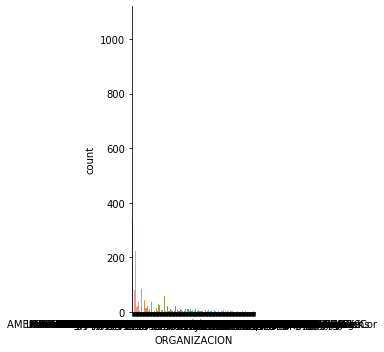

In [46]:
sb.catplot('ORGANIZACION',data=df_visual_sample,kind="count")

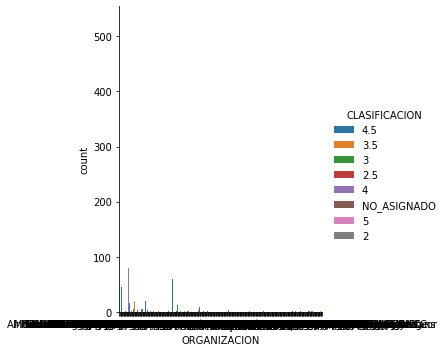

In [47]:
sb.catplot('ORGANIZACION',data=df_visual_sample,hue='CLASIFICACION',kind="count")

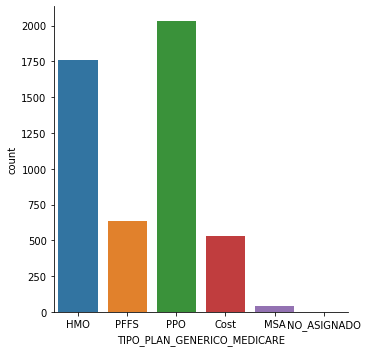

In [48]:
sb.catplot('TIPO_PLAN_GENERICO_MEDICARE',data=df_visual_sample,kind="count")

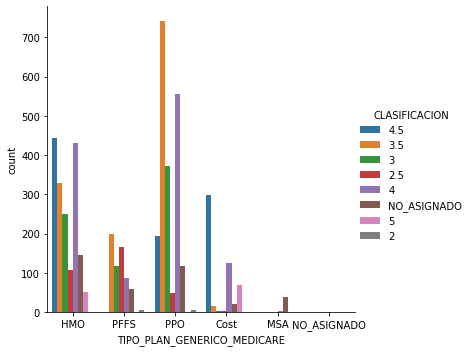

In [49]:
sb.catplot('TIPO_PLAN_GENERICO_MEDICARE',data=df_visual_sample,hue='CLASIFICACION',kind="count")

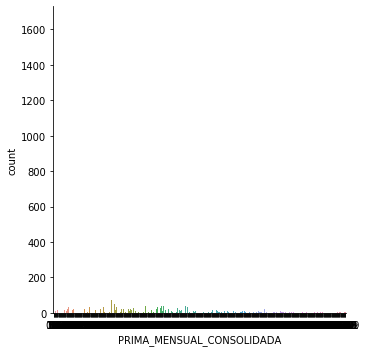

In [50]:
sb.catplot('PRIMA_MENSUAL_CONSOLIDADA',data=df_visual_sample,kind="count")

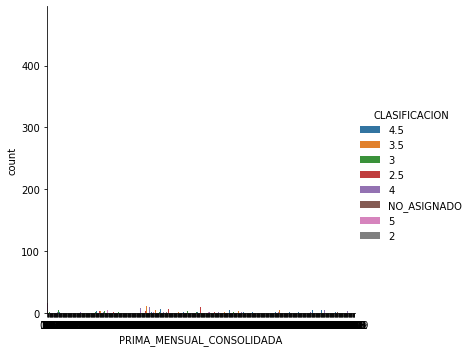

In [51]:
sb.catplot('PRIMA_MENSUAL_CONSOLIDADA',data=df_visual_sample,hue='CLASIFICACION',kind="count")

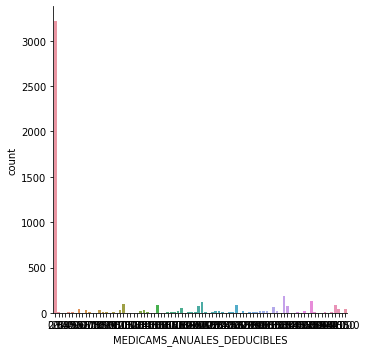

In [52]:
sb.catplot('MEDICAMS_ANUALES_DEDUCIBLES',data=df_visual_sample,kind="count")

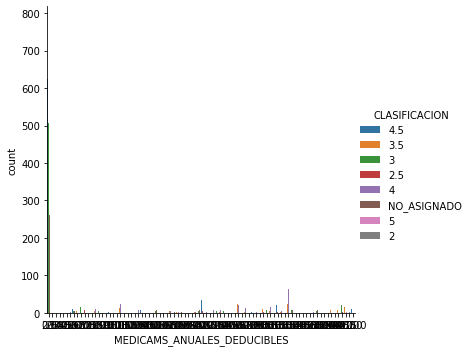

In [53]:
sb.catplot('MEDICAMS_ANUALES_DEDUCIBLES',data=df_visual_sample,hue='CLASIFICACION',kind="count")

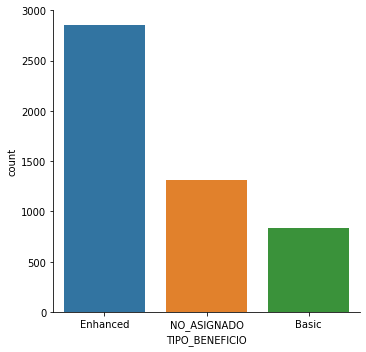

In [54]:
sb.catplot('TIPO_BENEFICIO',data=df_visual_sample,kind="count")

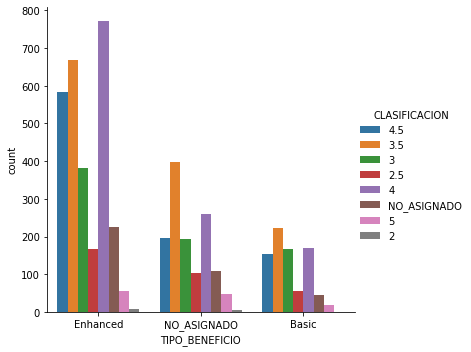

In [55]:
sb.catplot('TIPO_BENEFICIO',data=df_visual_sample,hue='CLASIFICACION',kind="count")

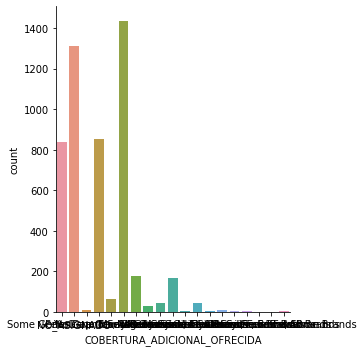

In [56]:
sb.catplot('COBERTURA_ADICIONAL_OFRECIDA',data=df_visual_sample,kind="count")

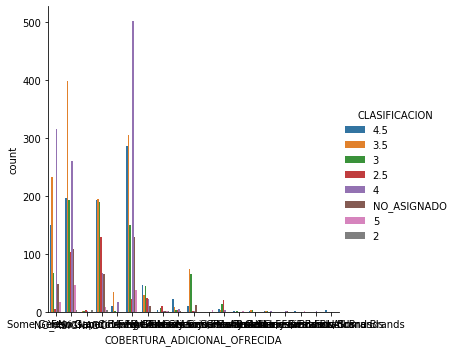

In [57]:
sb.catplot('COBERTURA_ADICIONAL_OFRECIDA',data=df_visual_sample,hue='CLASIFICACION',kind="count")

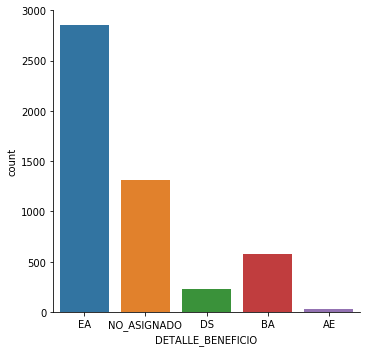

In [58]:
sb.catplot('DETALLE_BENEFICIO',data=df_visual_sample,kind="count")

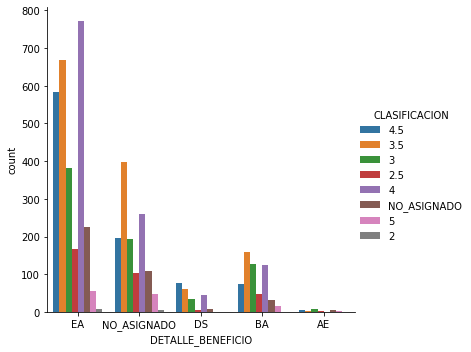

In [59]:
sb.catplot('DETALLE_BENEFICIO',data=df_visual_sample,hue='CLASIFICACION',kind="count")

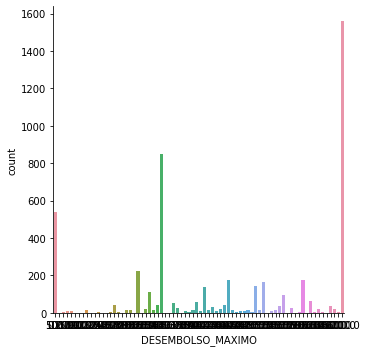

In [60]:
sb.catplot('DESEMBOLSO_MAXIMO',data=df_visual_sample,kind="count")

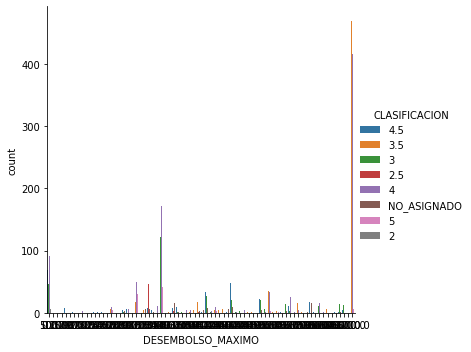

In [61]:
sb.catplot('DESEMBOLSO_MAXIMO',data=df_visual_sample,hue='CLASIFICACION',kind="count")

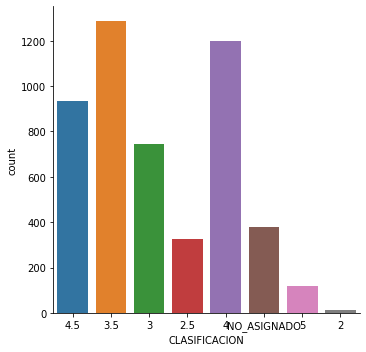

In [62]:
sb.catplot('CLASIFICACION',data=df_visual_sample,kind="count")

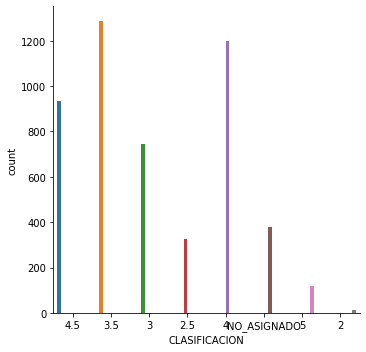

In [63]:
sb.catplot('CLASIFICACION',data=df_visual_sample,hue='CLASIFICACION',kind="count")

In [64]:
df_from_xlsx_total.columns

Index(['ESTADO', 'CONDADO', 'ORGANIZACION', 'TIPO_PLAN_GENERICO_MEDICARE',
       'PRIMA_MENSUAL_CONSOLIDADA', 'MEDICAMS_ANUALES_DEDUCIBLES',
       'TIPO_BENEFICIO', 'COBERTURA_ADICIONAL_OFRECIDA', 'DETALLE_BENEFICIO',
       'DESEMBOLSO_MAXIMO', 'CLASIFICACION'],
      dtype='object')

In [65]:
# Draw some dispersion graph for columns pairs to visualize the lack of information

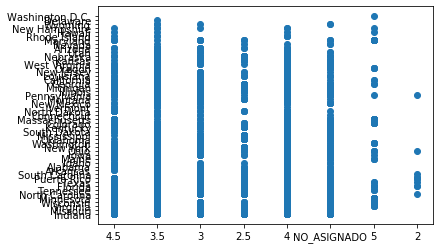

In [66]:
plt.scatter(df_visual_sample['CLASIFICACION'].values, df_visual_sample['ESTADO'].values)
plt.show()

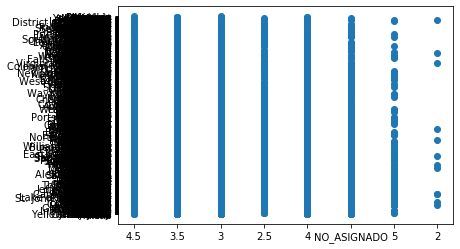

In [67]:
plt.scatter(df_visual_sample['CLASIFICACION'].values, df_visual_sample['CONDADO'].values)
plt.show()

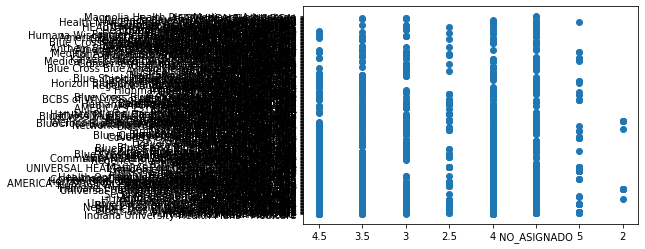

In [68]:
plt.scatter(df_visual_sample['CLASIFICACION'].values, df_visual_sample['ORGANIZACION'].values)
plt.show()

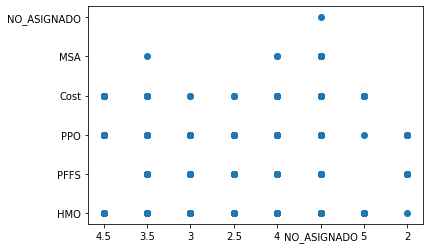

In [69]:
plt.scatter(df_visual_sample['CLASIFICACION'].values, df_visual_sample['TIPO_PLAN_GENERICO_MEDICARE'].values)
plt.show()

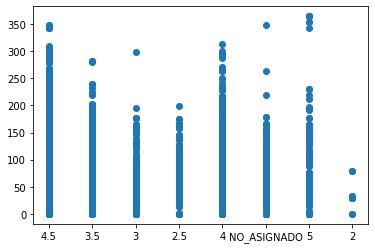

In [70]:
plt.scatter(df_visual_sample['CLASIFICACION'].values, df_visual_sample['PRIMA_MENSUAL_CONSOLIDADA'].values)
plt.show()

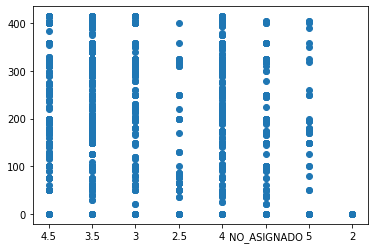

In [71]:
plt.scatter(df_visual_sample['CLASIFICACION'].values, df_visual_sample['MEDICAMS_ANUALES_DEDUCIBLES'].values)
plt.show()

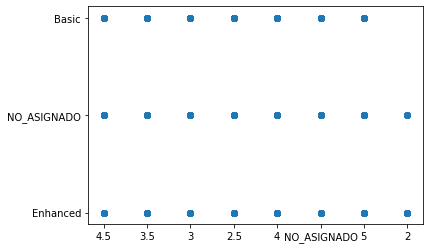

In [72]:
plt.scatter(df_visual_sample['CLASIFICACION'].values, df_visual_sample['TIPO_BENEFICIO'].values)
plt.show()

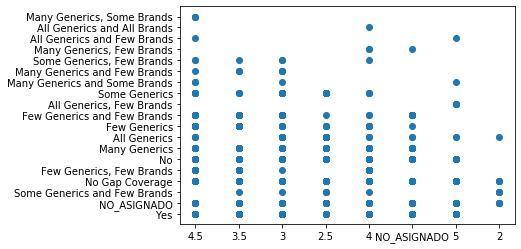

In [73]:
plt.scatter(df_visual_sample['CLASIFICACION'].values, df_visual_sample['COBERTURA_ADICIONAL_OFRECIDA'].values)
plt.show()

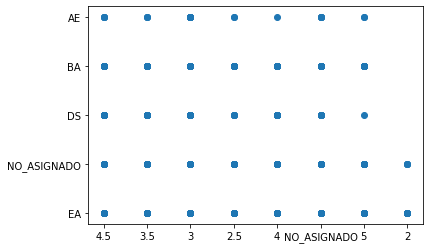

In [74]:
plt.scatter(df_visual_sample['CLASIFICACION'].values, df_visual_sample['DETALLE_BENEFICIO'].values)
plt.show()

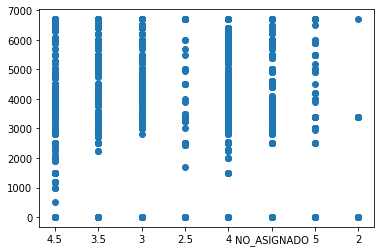

In [75]:
plt.scatter(df_visual_sample['CLASIFICACION'].values, df_visual_sample['DESEMBOLSO_MAXIMO'].values)
plt.show()

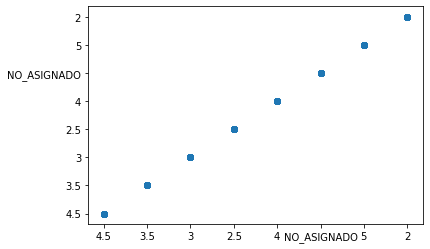

In [76]:
plt.scatter(df_visual_sample['CLASIFICACION'].values, df_visual_sample['CLASIFICACION'].values)
plt.show()

In [77]:
df_from_xlsx_total.columns

Index(['ESTADO', 'CONDADO', 'ORGANIZACION', 'TIPO_PLAN_GENERICO_MEDICARE',
       'PRIMA_MENSUAL_CONSOLIDADA', 'MEDICAMS_ANUALES_DEDUCIBLES',
       'TIPO_BENEFICIO', 'COBERTURA_ADICIONAL_OFRECIDA', 'DETALLE_BENEFICIO',
       'DESEMBOLSO_MAXIMO', 'CLASIFICACION'],
      dtype='object')

In [78]:
!date

vie ene 10 16:02:16 CET 2020
